In [1]:
pip install pandas numpy matplotlib seaborn lightgbm scikit-learn

Импортируем необходимые библиотеки

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Загрузка данных + вывод первых 10 строк

In [3]:
df = pd.read_csv('./data.csv')
df.head(10)

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1
5,5,50,170,55,51.0,1.2,1.2,1,1,146,...,31,99,15.9,1,0.7,24,42,119,1,1
6,6,45,160,55,69.0,1.5,1.2,1,1,150,...,69,122,13.0,1,0.7,17,12,16,0,0
7,7,55,155,60,84.5,0.7,0.9,1,1,137,...,51,198,14.5,1,0.7,16,15,16,0,0
8,8,40,165,70,89.0,0.7,1.0,1,1,130,...,59,150,15.7,1,0.9,24,21,31,0,1
9,9,40,155,50,73.0,1.5,1.5,1,1,105,...,55,122,13.2,1,0.7,22,16,14,0,0


1. **EDA**

In [4]:
# Смотрим типы данных для выявления возможных проблем с ними
print(df.info())

# Смотрим на сводную статистику по столбцам среднее значение, стандартное отклонение и т. д.
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

1.1. Выводим количество курильщиков и некурящих, а также их пропорции и создаём гистограмму, визуализирующую распределение классов. Это помогает оценить, сбалансирован ли набор данных.

smoking
0    89603
1    69653
Name: count, dtype: int64
smoking
0    0.562635
1    0.437365
Name: proportion, dtype: float64


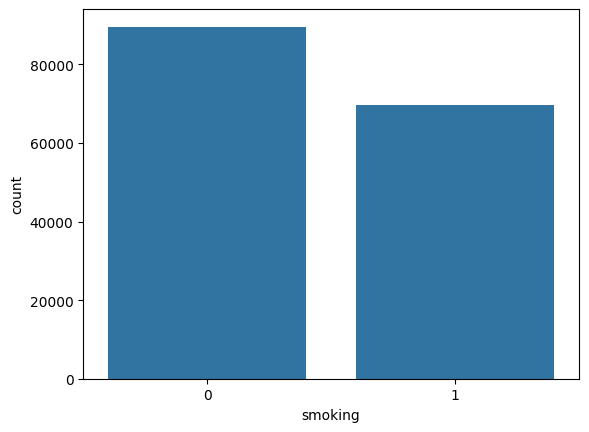

In [5]:
print(df['smoking'].value_counts())
print(df['smoking'].value_counts(normalize=True)) # Proportions
sns.countplot(x='smoking', data=df)
plt.show()

1.2. Проверяем есть ли пропущенные значения

In [6]:
print("Пропущенные значения:")
display(df.isnull().sum())

Пропущенные значения:


,0
id,0
age,0
height(cm),0
weight(kg),0
waist(cm),0
eyesight(left),0
eyesight(right),0
hearing(left),0
hearing(right),0
systolic,0


1.3. Построим гистограммы для каждого столбца (кроме id), чтобы наглядно представить распределение каждой переменной переменной

23


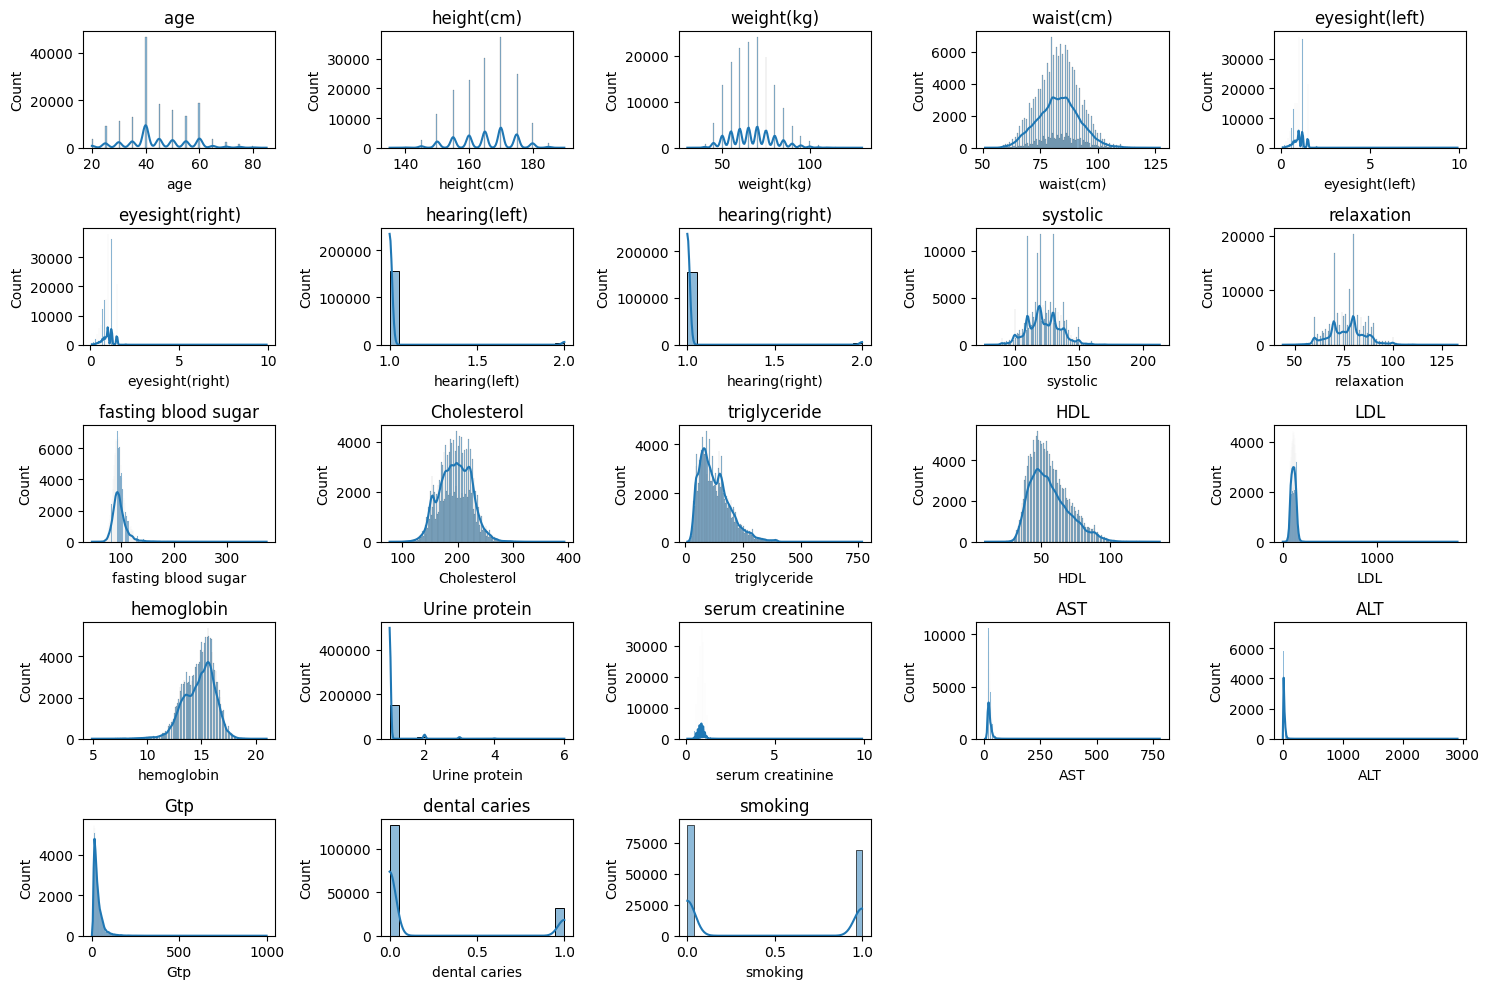

In [7]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.drop('id')
print(len(numerical_cols))
# Create histograms
plt.figure(figsize=(15, 10)) # Adjust figure size as needed
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 5, i + 1)  # Adjust subplot grid as needed
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

1.4. Выявление категориальных признаков. Если они существуют, то их придётся обрабатывать по другому прежде, чем использовать машинное обучение

In [8]:
categorical_cols = df.select_dtypes(exclude=np.number).columns
print(len(categorical_cols))
for col in categorical_cols:
    print(f"Сводная таблица для {col}:")
    display(pd.crosstab(index=df[col], columns="count"))

0


1.5. Построим корреляционную матрица, которая позволяет быстро получить представление о линейных взаимосвязях между переменными в вашем наборе данных

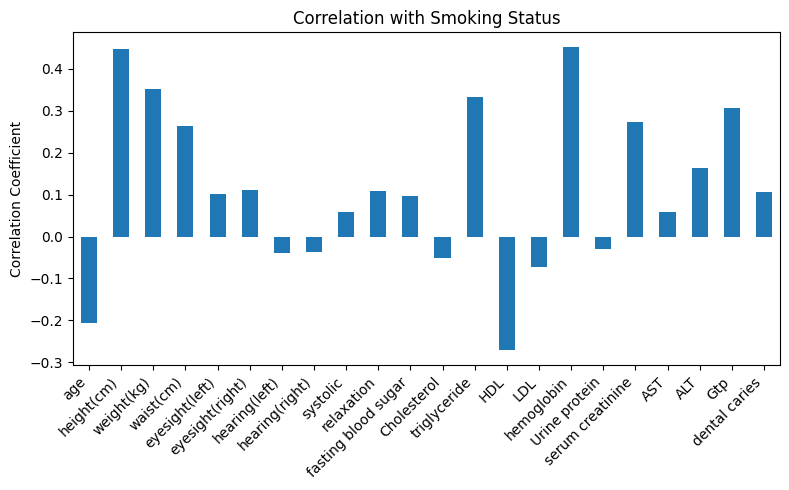

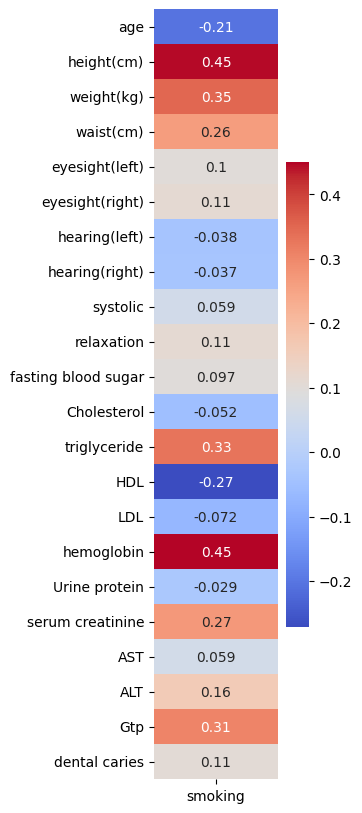

In [9]:
correlation_matrix = df.corr()


# Выбираем только столбец со статусом курения и удаляем ненужных строки 'id'
# и 'smoking'
smoking_correlations = correlation_matrix['smoking'].drop(['smoking', 'id'])

# Создаём гистограмму коэффициентов корреляции
plt.figure(figsize=(8, 5))
smoking_correlations.plot(kind='bar')
plt.title('Correlation with Smoking Status')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Выводим стобец 'smoking' корреляционной матрицы
plt.figure(figsize=(2,10))
sns.heatmap(smoking_correlations.to_frame(), annot=True, cmap='coolwarm', cbar=True)
plt.show()

2. **Предварительная обработка данных**

2.0. Так как в исследуемом наборе данных отсутствуют категориальные признаки (не числовые), то этап их приобразования пропустим и перейдём к следующему шагу

2.1. Разделим выборку на параметры (X - все наши признаки, заодно удалив ненужный столбец для обучения: 'id') и значение (y - столбец с информацией является человек курящим или нет)

In [10]:
X = df.drop(['id', 'smoking'], axis=1)
y = df['smoking']

2.2. Нормализуем данные. Нормализация данных необходима для того, чтобы привести все признаки к одному масштабу.

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

2.3. Делим выборки X и y на тестовую и обучающую выборки

In [12]:
# stratify=y - для сохранения баланса 0/1 в обучающей и тестовых выборках
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.15,
                                                    random_state=42,
                                                    stratify=y)

3. **Построение и оценка модели**

3.1. Построение модели.
Используем LightGBM.

In [13]:
# Вводим важные параметры для модели
params = {
    'objective': 'binary',  # указываем, что задача бинарной классификации
                            # (курящий/некурящий)
    'metric': 'binary_logloss', # метрику оценки мониторинга производительности во время обучения
    'boosting_type': 'gbdt',  # тип алгоритма бустинга
    'num_leaves': 40,  # максимальное количество листьев у каждого дерева
    'learning_rate': 0.15,  # скорость обучения
    'feature_fraction': 0.85,  # доля используемых признаков
    'bagging_fraction': 0.75,  # доля случайно выбранных экземпляров данных для каждого дерева
    'bagging_freq': 5,  # как часто (в пересчёте на количество итераций) выполняется бэггинг (агрегирование методом начальной загрузки)
    'reg_alpha': 0.1, # регуляризация L1 для дальнейшего контроля переобучения
    'reg_lambda': 0.1, # регуляризацию L2 для дальнейшего контроля переобучения
    'verbose': 0  # определяющий подробность процесса обучения; 0 - ничего не выводим в процессе обученитя
}

# создаём Dataset для эффективного хранения обучающих и тестовых данных
# в формате, оптимизированном для алгоритма обучения LightGBM.
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# обучаем модель  с использованием указанных гиперпараметров (params),
# обучающих данных (train_data), максимального количества раундов бустинга (num_boost_round),
# а также отслеживает производительность модели на проверочном наборе данных (valid_sets) во время обучения.
gbm = lgb.train(params, train_data, num_boost_round=100, valid_sets=test_data)

3.2. Создание предсказанных данных

In [14]:
# получаем вероятности для данных тестовой выборки
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# преобразуем полученные вероятности в бинарные метки (курящий/некурящий)
y_pred_binary = (y_pred > 0.5).astype(int)

3.3. Оценка обученной модели

In [15]:
# Оценка способности разделять два класса
auc = roc_auc_score(y_test, y_pred_binary)
print(f"AUC-ROC: {auc}")

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Точность модели: {accuracy:.2f}")

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred_binary)
print("Матрица ошибок:")
print(cm)

# Отчет классификации
print("Отчёт классификации:")
cr = classification_report(y_test, y_pred_binary, output_dict=True)
df = pd.DataFrame(cr).T
df

AUC-ROC: 0.7862605222780108
Точность модели: 0.78
Матрица ошибок:
[[10191  3250]
 [ 1940  8508]]
Отчёт классификации:


,precision,recall,f1-score,support
0,0.840079,0.758203,0.797044,13441.000000
1,0.723592,0.814319,0.766279,10448.000000
accuracy,0.782745,0.782745,0.782745,0.782745
macro avg,0.781836,0.786261,0.781662,23889.000000
weighted avg,0.789133,0.782745,0.783589,23889.000000


# **Статус курения пациента**
# **Модель LightGBM**
LightGBM (Light Gradient Boosting Machine) — это платформа для градиентного бустинга, которая использует алгоритмы обучения на основе деревьев. Она отличается высокой эффективностью, масштабируемостью и точностью. Ключевые особенности:

1. Градиентный бустинг: создаёт ансамбль деревьев решений, где каждое новое дерево исправляет ошибки предыдущих деревьев.

2. Послойный рост дерева: в отличие от роста по глубине (по уровням), LightGBM выращивает деревья послойно, что может повысить точность, но также может привести к переобучению, если не контролировать этот процесс.

3. Эффективная обработка категориальных признаков: позволяет напрямую обрабатывать категориальные признаки без необходимости однократного кодирования, повышая эффективность и точность.

4. Регуляризация: регуляризация L1 (LASSO) и L2 (Риджа) может помочь предотвратить переобучение за счёт добавления штрафов за сложность модели

LightGBM — это быстрый, экономичный в плане памяти и точный алгоритм градиентного бустинга, широко используемый для различных задач машинного обучения, особенно для работы с большими наборами данных. Его алгоритмы на основе гистограмм и поэтапного роста обеспечивают более высокую скорость и производительность по сравнению с другими алгоритмами градиентного бустинга.
# **Результаты выполненной задачи**
**Формулировка задачи:**
Предсказать статус курения пациента на основе различных показателей здоровья (рост, вес, зрения (на обоих глазах по отдельности) и другие факторы).

В ходе решения формулированной задачи были выполнены:
1. **EDA**

  *   Выяснили, что в выборке находятся данные 159256 пациентов
  *   Показателей здоровья представленных в выборке: 22
  *   Выяснили, что в нашей выборке некурящих пациентов больше курящих (что говорит о несбалансированности выборки, но при этом она оторажает реальную действительность)
  *   Выяснили, что пропущенных значений в выборке не было
  *   Выяснили, что среди предоставленных факторов нет категориальных (не числовых)
  *   Выяснили, что все факторы в разной степени коллерируют со статусом курения

2. **Предварительная обработка данных**
  *   Выборка была разделена на параметры (показатели здоровья) и значение (статус курения)
  *   Параметры (показатели здоровья) были нормализованы для улучшения качества модели.
  *   Выборки были разделены на тестовую и обучающую
  *   Сюда можно также отнести то, что было произведено преобразование данных с помощью LightGBM.Dataset для эффективного хранения обучающих и тестовых данных в формате, оптимизированном для алгоритма обучения LightGBM.
3. **Построение и оценка модели**
  * Перед обучением модели прописали для неё важные параметры:
    * objective: 'binary': Это указывает на то, что задача заключается в бинарной классификации. Модель научится прогнозировать один из двух классов (в данном случае «курильщик» или «некурящий»).
    * metric: 'binary_logloss': Здесь задаётся метрика оценки, используемая для мониторинга производительности модели во время обучения. binary_logloss — это двоичная кросс-энтропийная потеря. Минимизация этой потери направлена на повышение прогностической вероятности модели.
    * boosting_type: 'gbdt': В качестве типа повышения эффективности выбирается алгоритм градиентного бустинга дерева решений (GBDT). Это наиболее распространённый и часто хороший выбор по умолчанию.
    * num_leaves: 40: Это значение определяет максимальное количество листьев в каждом дереве решений. Увеличение этого значения повышает способность модели выявлять более сложные взаимосвязи, но также увеличивает риск переобучения
    * learning_rate: 0.25: Это значение определяет размер шага на каждой итерации обучения. Это относительно высокая скорость обучения. Более низкая скорость обучения (например, 0,01, 0,05) часто приводит к лучшим результатам, но требует большего количества итераций обучения. Более высокая скорость обучения может быть полезна для ускорения обучения, но может привести к трудностям при схождении к оптимальному решению.
    * feature_fraction: 0.85: Это означает, что 85% признаков будут случайным образом выбраны для каждого дерева. Это разновидность бэггинга (агрегирования методом начальной загрузки), которая помогает предотвратить переобучение за счёт введения случайности в процесс обучения.
    * bagging_fraction: 0.75: Это означает, что 75% обучающих данных будут случайным образом выбраны для каждого дерева. Это ещё одна форма бэггинга, которая дополнительно снижает переобучение и улучшает обобщение.
    * reg_alpha: 0.1: Это параметр регуляризации L1 (LASSO). Он добавляет к модели штраф, пропорциональный абсолютному значению коэффициентов модели. Это помогает предотвратить переобучение, уменьшая коэффициенты до нуля и тем самым упрощая модель.
    * reg_lambda: 0.1: Это параметр регуляризации L2 (Риджа). Он добавляет штрафную функцию, пропорциональную квадрату коэффициентов модели. Как и L1, он помогает предотвратить переобучение, но оказывает немного другое влияние на коэффициенты модели.
  * Произвели обучение модели LightGBM с указанными выше параметрами
  * Из оценки модели можно сделать следующие выводы:
    * AUC-ROC (0,786) - это значение указывает на то, что способность модели различать два класса достаточно хороша, но не идеальна.
    * Более низкая точность и показатель F1 для класса 1 (курильщики) говорит о том, что модель, возможно, испытывает трудности с точной классификацией этого класса.
    * К таким результатам могла привести естественная небольшая несбалансированность классов (число некурящих людей больше, чем курящих)

Таким образом, применение LightGBM помогло создать модель, которая демонстрирует умеренную производительность для диагностики статуса курения пациента для различных показателей.



